<a href="https://colab.research.google.com/github/spacemancathy/ML-for-sci-data/blob/main/ML_tasks_2nd_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
path = '/content/drive/MyDrive/ML for data processing/pone.0190322.s022.xlsx'
df = pd.read_excel(path, index_col = 'Unnamed: 0')

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [17]:
np.random.seed(5)

# EDA

Данные: рейтинг сложности музыкальных ритмов, полученный в двух онлайн-экспериментах, проведенных Флёр Бауэр с коллегами (https://doi.org/10.1371/journal.pone.0190322). 

Цель: построить модель, предсказывающую рейтинг ритма по характеристикам ритма и уровня музыкального образования слушателя.

In [3]:
df.head()

,User_id,Years_training,Experiment,Accent_type,Beats_missing,Accents_offbeat,Accents_offbeat_category,Rating
0,133,0,2,1,6,6,0,9
1,171,0,1,1,0,0,0,2
2,104,8,2,1,4,2,0,10
3,9,15,1,1,4,4,1,5
4,143,20,1,1,2,2,1,2


Обозначения в колонках: 
* **Accent type** (тип ритмического акцента): 1 - temporal, 2 - 
intensity 
* **Accents_offbeat_category** (сколько акцентов не попадают в ритм): 0 - few, 1 - some, 2 - many
* **Rating** (оценка сложности ритма участником): 1 - самый простой, 10 - самый сложный

In [4]:
df.columns

Index(['User_id', 'Years_training', 'Experiment', 'Accent_type',
       'Beats_missing', 'Accents_offbeat', 'Accents_offbeat_category',
       'Rating'],
      dtype='object')

In [5]:
df.dtypes

User_id                     int64
Years_training              int64
Experiment                  int64
Accent_type                 int64
Beats_missing               int64
Accents_offbeat             int64
Accents_offbeat_category    int64
Rating                      int64
dtype: object

In [6]:
df.isna().sum()

User_id                     0
Years_training              0
Experiment                  0
Accent_type                 0
Beats_missing               0
Accents_offbeat             0
Accents_offbeat_category    0
Rating                      0
dtype: int64

Так как датасет был предобработан группой авторов исследования, в процессе были исключены строки с отсутствующими значениями - те, в которых участники не дошли до конца онлайн-эксперимента. Значит, нам не нужно дополнительно предобрабатывать данные.

In [7]:
df.describe()

,User_id,Years_training,Experiment,Accent_type,Beats_missing,Accents_offbeat,Accents_offbeat_category,Rating
count,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000
mean,89.447784,8.773900,1.526405,1.500340,3.016471,3.113262,0.699185,4.254457
std,45.266376,7.299364,0.499323,0.500021,1.947751,2.851671,0.771907,2.795124
min,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,48.000000,4.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000
50%,96.000000,7.000000,2.000000,2.000000,4.000000,2.000000,1.000000,4.000000
75%,128.000000,14.000000,2.000000,2.000000,4.000000,6.000000,1.000000,7.000000
max,171.000000,25.000000,2.000000,2.000000,6.000000,10.000000,2.000000,10.000000


In [22]:
df1 = df.drop(columns=['User_id', 'Experiment'])
df1.describe()

,Years_training,Accent_type,Beats_missing,Accents_offbeat,Accents_offbeat_category,Rating
count,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000
mean,8.773900,1.500340,3.016471,3.113262,0.699185,4.254457
std,7.299364,0.500021,1.947751,2.851671,0.771907,2.795124
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000
50%,7.000000,2.000000,4.000000,2.000000,1.000000,4.000000
75%,14.000000,2.000000,4.000000,6.000000,1.000000,7.000000
max,25.000000,2.000000,6.000000,10.000000,2.000000,10.000000


Отбрасываем колонки с идентификатором отдельного участника и номером эксперимента, так как мы не будем их использовать в предсказывании оценки участником сложности предложенного ритма (они не относятся к характеристикам ритма).

# **Visualisations**

Text(0.5, 1.0, 'Rating v Type of accent')

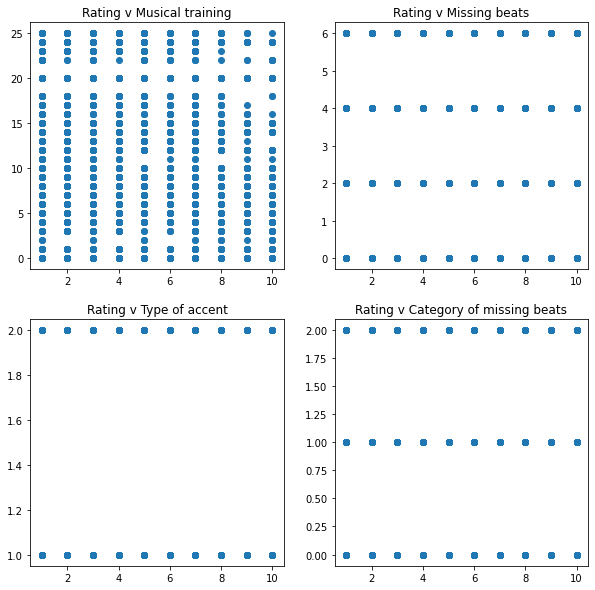

In [84]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].scatter(df1['Rating'], df1['Years_training'])
axs[0, 0].set_title('Rating v Musical training')
axs[1, 1].scatter(df1['Rating'], df1['Accents_offbeat_category'])
axs[1, 1].set_title('Rating v Category of missing beats')
axs[0, 1].scatter(df1['Rating'], df1['Beats_missing'])
axs[0, 1].set_title('Rating v Missing beats')
axs[1, 0].scatter(df1['Rating'], df1['Accent_type'])
axs[1, 0].set_title('Rating v Type of accent')

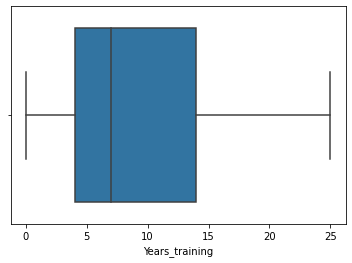

In [80]:
sns.boxplot(x=df1['Years_training'])

Так как среди всех переменных выбросы теоретически могли быть только в количестве лет музыкального образования, имеет смысл проверить их только в этой переменной. Как можно увидеть, их обнаружено не было.

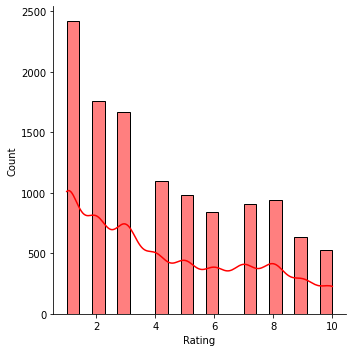

In [24]:
sns.displot(data = df1, x='Rating', color='r', kde = True)

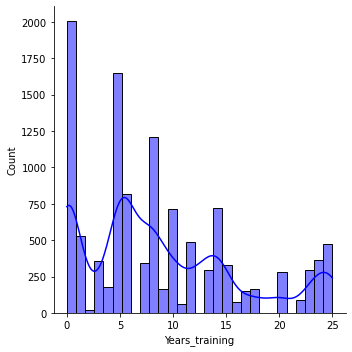

In [25]:
sns.displot(data = df1, x='Years_training', color='b', kde = True) 

На графиках выше можно увидеть, что участники чаще оценивали ритмы как более простые к восприятию (давали им меньший рейтинг), а также что б*о*льшая часть участников имеет до 5 лет музыкального образования (то есть, вероятнее всего, они не являются профессиональными музыкантами).

В качестве модели для решения задачи будет использоваться линейная регрессия. Соответственно, в качестве метрики предполагается использовать MSE (и RMSE), так как в данных нет выбросов. В то же время эти метрики позволят обеспечить достаточную точность за счет большого штрафа за ошибки.

# Baseline model: dummy regressor

In [69]:
corrs = df1.corr()
upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool))
upper_tri

<ipython-input-69-98023673d3bb>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool))


,Years_training,Accent_type,Beats_missing,Accents_offbeat,Accents_offbeat_category,Rating
Years_training,NaN,-0.00141,0.024516,0.049647,0.038759,-0.115491
Accent_type,NaN,NaN,-0.003319,-0.004553,-0.007325,-0.142743
Beats_missing,NaN,NaN,NaN,0.856704,0.325833,0.174333
Accents_offbeat,NaN,NaN,NaN,NaN,0.663571,0.134114
Accents_offbeat_category,NaN,NaN,NaN,NaN,NaN,0.064563
Rating,NaN,NaN,NaN,NaN,NaN,NaN


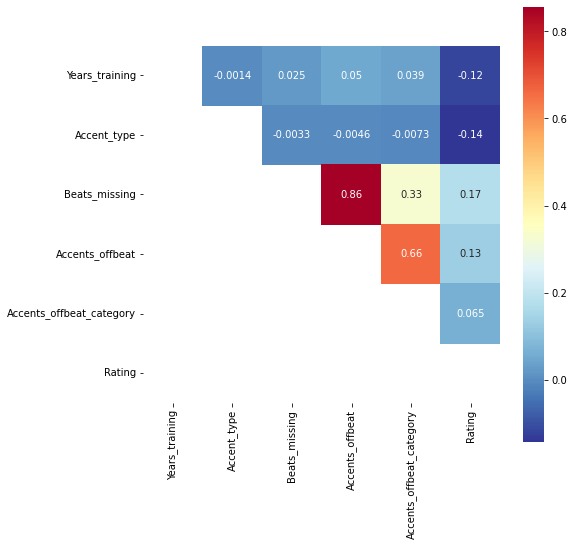

In [70]:
plt.figure(figsize=(8, 8))
sns.heatmap(upper_tri, cmap="RdYlBu_r", square=True, annot=True);

Так как мы не обнаружили значительных корреляций между разными признаками целевой переменной, мы можем перейти к анализу не исключая признаки.

In [65]:
x_data = df1[['Years_training', 'Accent_type', 'Beats_missing', 'Accents_offbeat','Accents_offbeat_category']]
y_data = df1['Rating']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state=2023, test_size=0.25)

In [67]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

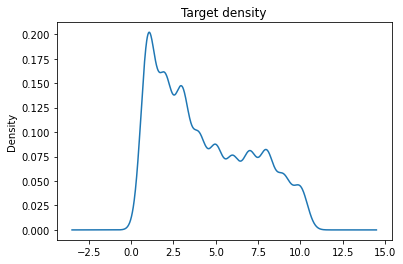

In [77]:
y_data.plot(kind='kde', title='Target density')

Для обеспечения более точных результатов, проведено масштабирование данных.

In [78]:
dummy = DummyRegressor(strategy='median')
dummy.fit(X_train, y_train)
y_preds_dummy = dummy.predict(X_test)

In [82]:
print(f'RMSE: {mean_squared_error(y_test, y_preds_dummy, squared=False)}')
print(f'MSE: {mean_squared_error(y_test, y_preds_dummy)}')

RMSE: 3.0519553141205713
MSE: 9.314431239388794


# Работа с более сложной моделью

In [71]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds_lr = lr.predict(X_test)

In [74]:
print(f'RMSE: {mean_squared_error(y_test, y_preds_lr, squared=False)}')

RMSE: 2.656980379222193
